# Convolution
Note: running Python 3.6.6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import convolve

## Convolution with simple signals
$ y = x * h $
### Unit pulse function
$ y[n] = x[n] * \delta[n] $

In [2]:
from scipy.signal import unit_impulse

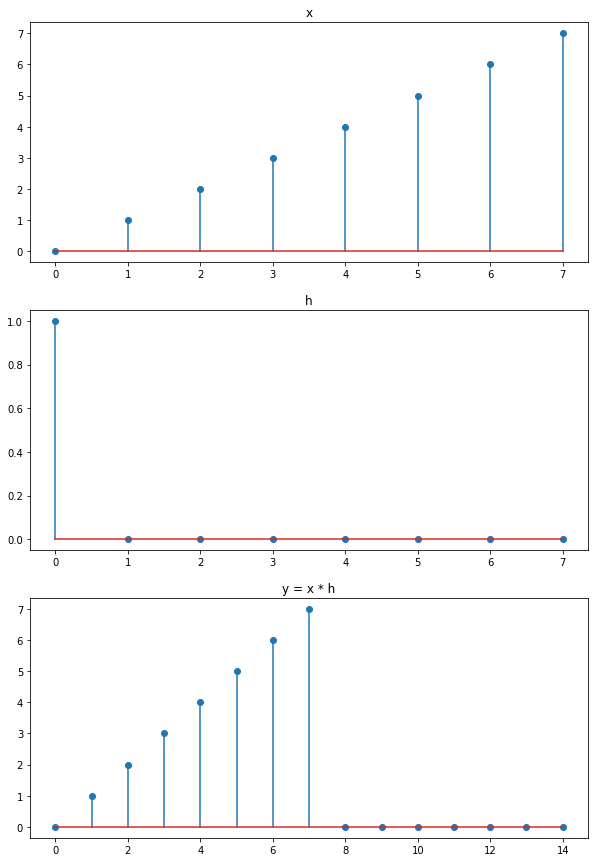

In [3]:
N = 8 # length of x
M = 8 # length of h
L = N + M - 1 # length of y
n = np.arange(N)
m = np.arange(M)
l = np.arange(L)

x = n # x is the ramp function
h = unit_impulse(N,0)
y = convolve(x,h)

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.stem(n,x)
plt.title('x')
plt.subplot(312)
plt.stem(m,h)
plt.title('h')
plt.subplot(313)
plt.stem(l,y)
plt.title('y = x * h')
plt.show()

## Shifted unit impulse
$y[n] = x[n] - \delta[n - n_0] = x[n - n_0]$

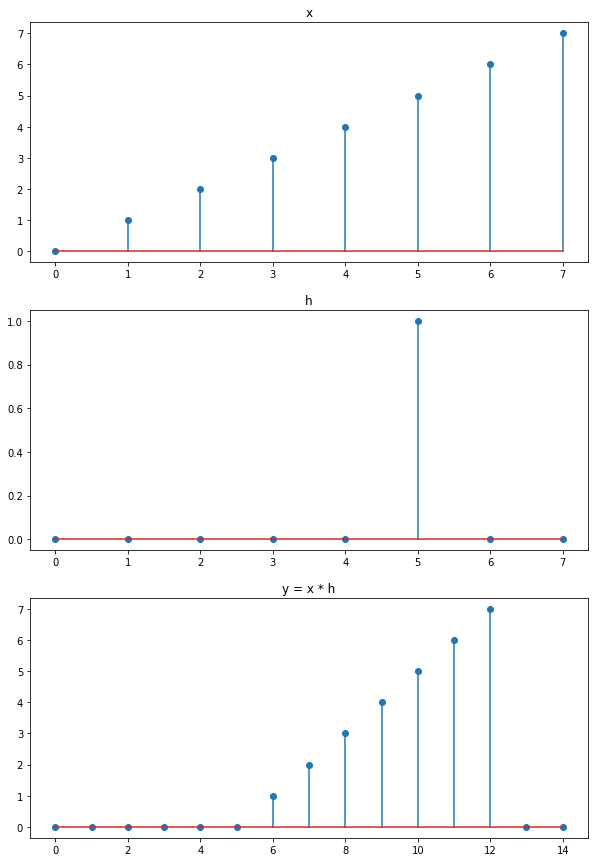

In [4]:
N = 8 # length of x
M = 8 # length of h
L = N + M - 1 # length of y
n = np.arange(N)
m = np.arange(M)
l = np.arange(L)

x = n # x is the ramp function
h = unit_impulse(N,5) # change this number to change the offset, n_0
y = convolve(x,h)

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.stem(n,x)
plt.title('x')
plt.subplot(312)
plt.stem(m,h)
plt.title('h')
plt.subplot(313)
plt.stem(l,y)
plt.title('y = x * h')
plt.show()

## Convolution of two rectangular functions
$ x[n] = \begin{cases} 1 & n \leq n_0 \\ 0 & else \end{cases} $

$ y[n] = x[n] * x[n] $

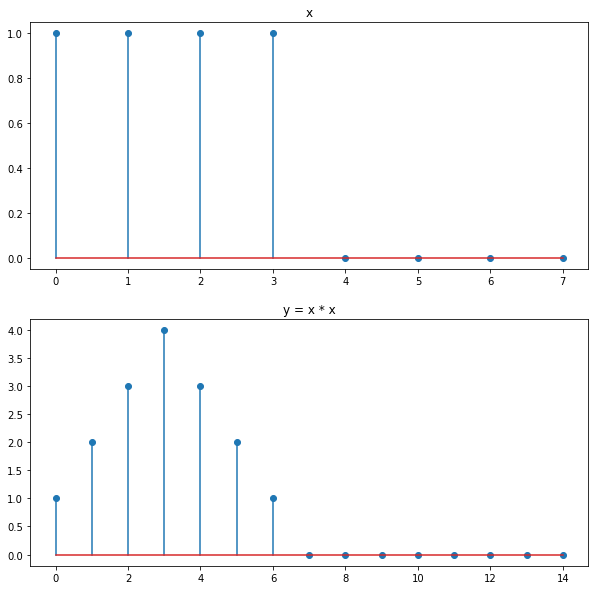

In [5]:
N = 8 
L = N + N - 1
n = np.arange(N)
l = np.arange(L)

n0 = 3 # use this to tune the length of the rectangle
x = np.zeros(N)
x[n <= n0] = 1

y = convolve(x,x)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.stem(n,x)
plt.title('x')
plt.subplot(212)
plt.stem(l,y)
plt.title('y = x * x')
plt.show()

## Demonstrating linearity of convolution

Why we can use the **impulse response** to characterize a system

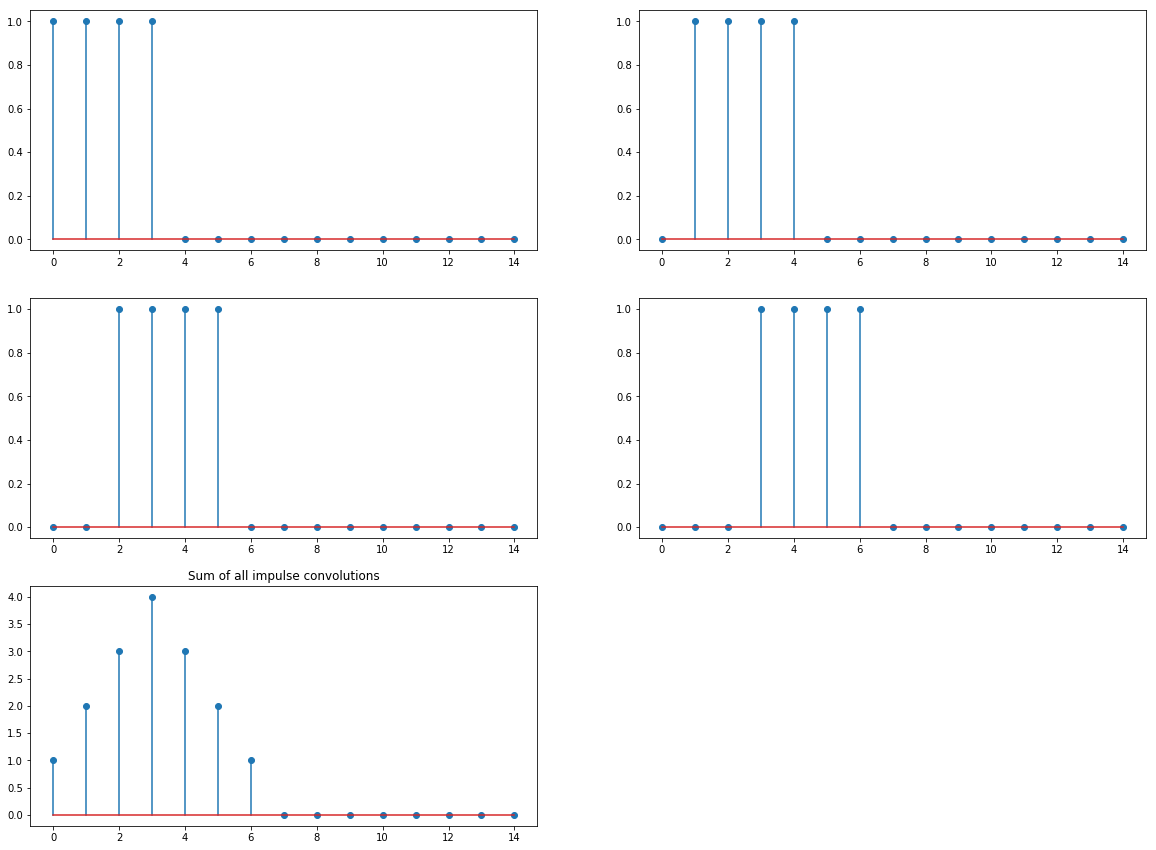

In [6]:
h0 = unit_impulse(N,0)
h1 = unit_impulse(N,1)
h2 = unit_impulse(N,2)
h3 = unit_impulse(N,3)

y0 = convolve(x, h0)
y1 = convolve(x, h1)
y2 = convolve(x, h2)
y3 = convolve(x, h3)

y = y0 + y1 + y2 + y3

plt.figure(figsize=(20,15))
plt.subplot(321)
plt.stem(l,y0)
plt.subplot(322)
plt.stem(l,y1)
plt.subplot(323)
plt.stem(l,y2)
plt.subplot(324)
plt.stem(l,y3)
plt.subplot(325)
plt.stem(l,y)
plt.title('Sum of all impulse convolutions')
plt.show()